# Oscillations

## Oscillations in Everyday Life

If asked to list some examples of oscillations that you can think of from your everyday life, you might come up with a list including

* water waves
* pendulums (e.g., in a grandfather clock)
* mass hanging from a spring
* strings on musical instruments (e.g., guitars and pianos)
* vibrating air columns in wind instruments (e.g., trumpets and organ pipes)
* atoms in matter
* electrons in electric circuits
* gravity waves (although not exactly "everyday life" in this case)

For example, when you pluck a guitar string, the sound you hear will be a specific note that will slowly get quieter.  Each small segment of the string oscillates about its equilibrium position. While guitar string oscillations are in fact a bit complicated--the tone (or "timbre") of the sound will depend on where along the string you pluck it--we can capture the essentials by considering a mass-spring system:


<!-- ```{tikz}
  \def\H{1}    % wall height
  \def\T{0.3}  % wall thickness
  \def\W{2.6}  % ground length
  \def\D{0.25} % ground depth
  \def\h{0.6}  % mass height
  \def\w{0.7}  % mass width
  \def\x{1.6}  % mass x position
  \draw[spring] (0,\h/2) --++ (\x,0);
  \draw[ground] (0,0) |-++ (-\T,\H) |-++ (\T+\W,-\H-\D) -- (\W,0) -- cycle;
  \draw (0,\H) -- (0,0) -- (\W,0);
  \draw[mass] (\x,0) rectangle++ (\w,\h) node[midway] {$m$};
``` -->

## Review of



\begin{equation}
x(t) = \cos(\omega t)
\end{equation}

In [1]:
# %load_ext tikzmagic


<!-- %%tikz
\draw (0,0) -- (2,2);
\draw (0,2) -- (2,0); -->


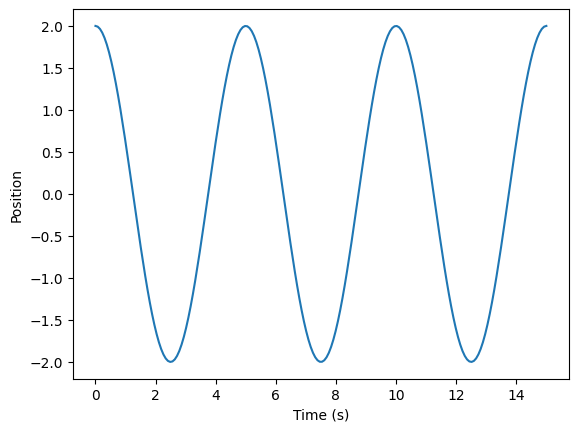

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A = 2.0                 # Amplitude of the oscillation
T = 5                   # Period T in seconds
omega = 2 * np.pi / T   # angular frequency [rad/s]
t = np.linspace(0,15,200)   # time values
x = A * np.cos( omega*t )

plt.plot(t,x)
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# %matplotlib inline

# Parameters
A = 2               # amplitude
omega = 2*np.pi/5   # angular frequency
t = np.linspace(0, 10, 200)  # time points

# Spring parameters
n_coils = 15        # number of coils
spring_length = 5   # equilibrium position
spring_amp = 0.2    # vertical amplitude of spring wiggles

# Figure setup
fig, ax = plt.subplots(figsize=(9, 2))
ax.set_xlim(-1, spring_length + A + 3)
ax.set_ylim(-1, 1)
ax.axis("off")  # hide axes for clarity

# Add wall
ax.fill_betweenx([-1, 1], -1, 0, color="gray", alpha=0.6)

# Add floor
ax.fill_between([0, spring_length + A + 3], -1, -0.5, color="saddlebrown", alpha=0.6)

# Equilibrium position marker
ax.axvline(spring_length, color="red", linestyle="--", lw=1.5, label="Equilibrium")

# Objects: spring line and block
spring_line, = ax.plot([], [], lw=2, color="black")
block = plt.Rectangle((spring_length, -0.5), 1, 1, fc="skyblue", ec="black")
ax.add_patch(block)

def make_spring(x0, x1, coils, amp):
    """Generate coordinates for a spring from x0 to x1."""
    xs = np.linspace(x0, x1, 200)
    ys = amp * np.sin(coils * np.pi * (xs - x0) / (x1 - x0))
    return xs, ys

def init():
    spring_line.set_data([], [])
    block.set_xy((spring_length, -0.5))
    return spring_line, block

def update(frame):
    # Block position (SHM)
    x_block = spring_length + A * np.cos(omega * frame)
    block.set_xy((x_block, -0.5))

    # Spring from wall (x=0) to block’s left side
    xs, ys = make_spring(0, x_block, n_coils, spring_amp)
    spring_line.set_data(xs, ys)

    return spring_line, block

ani = FuncAnimation(fig, update, frames=t, init_func=init,
                    blit=True, interval=50)

# Display animation in notebook
HTML(ani.to_jshtml())


<IPython.core.display.Javascript object>